In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.cluster import KMeans

In [2]:
# sns.set()

In [3]:
img =  cv2.imread('Ben10.jpg') #Reads an image into BGR Format
# img = img[:,250:650,]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_shape = img.shape
print(img.shape)

(510, 680, 3)


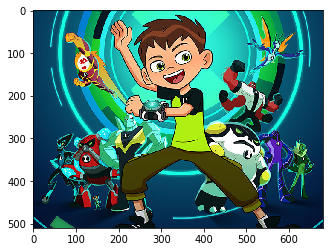

In [4]:
plt.imshow(img) # as RGB Format
plt.show()

In [5]:
X =  img.reshape((-1,3))
print(X.shape)

(346800, 3)


In [6]:
dominant_colors = 5

km = KMeans(n_clusters=dominant_colors)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_

In [8]:
print(centers)

[[218.46397278 202.89941289 126.27538585]
 [ 12.6722693   87.4754461   99.56712894]
 [ 42.78042408 213.26295126 197.33624908]
 [  7.64065782  26.93495414  43.81596839]
 [ 96.20481957  54.25007295  20.89735921]]


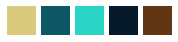

In [9]:
import numpy as np
colors = []
for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    colors.append(color)

    square = np.zeros((100,100,3),dtype='uint8')
    square[:,:,:] = color
    plt.imshow(square)
    plt.axis("off")
    
plt.show()

In [10]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([ 44974, 107196,  69169,  84300,  41161]))

In [11]:
# Repaint the Original Image
labels = km.labels_

In [12]:
new_img  = np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] = colors[labels[ix]]

print(new_img)

[[12.6722693  87.4754461  99.56712894]
 [12.6722693  87.4754461  99.56712894]
 [12.6722693  87.4754461  99.56712894]
 ...
 [ 7.64065782 26.93495414 43.81596839]
 [ 7.64065782 26.93495414 43.81596839]
 [ 7.64065782 26.93495414 43.81596839]]


In [13]:
new_img = new_img.reshape(img.shape)
print(img.shape)

(510, 680, 3)


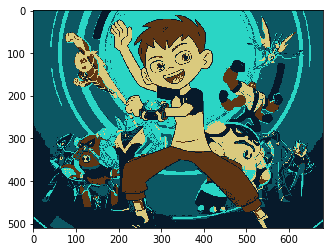

In [14]:
plt.imshow(new_img/255)
plt.show()

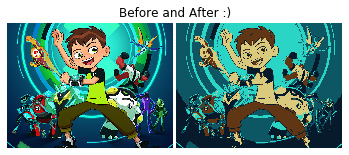

In [15]:
new_img = new_img/255
plt.imshow(np.hstack((img/255,np.ones((510,10,3)),new_img)))
plt.axis("off")
plt.title("Before and After :)")
plt.show()